Dataset Loaded: 569 samples, 30 features
Target classes: ['malignant' 'benign']

 Training Tree-Based Models
Decision Tree trained.
Random Forest trained.
Gradient Boosting trained.

 Tuning KNN


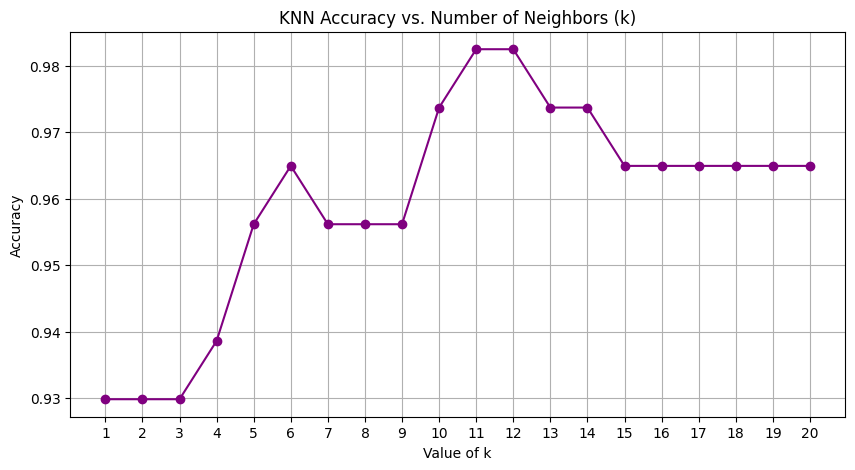

Optimal k value found: 11
FINAL MODEL COMPARISON TABLE - 


,Model,Accuracy,Precision,Recall,F1 Score
3,KNN (k=11),0.982456,0.972603,1.000000,0.986111
1,Random Forest,0.964912,0.958904,0.985915,0.972222
2,Gradient Boosting,0.956140,0.958333,0.971831,0.965035
0,Decision Tree,0.947368,0.957746,0.957746,0.957746


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Setup & Data Loading
# Breast Cancer dataset (Binary Classification: Malignant vs Benign)
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dataset Loaded: {X.shape[0]} samples, {X.shape[1]} features")
print("Target classes:", data.target_names)

final_results = []

# Tree-Based Models
tree_models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

print("\n Training Tree-Based Models")
for name, model in tree_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    final_results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })
    print(f"{name} trained.")

# KNN

print("\n Tuning KNN")
k_values = range(1, 21)
k_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    k_accuracies.append(knn.score(X_test, y_test))

# KNN Plot
plt.figure(figsize=(10, 5))
plt.plot(k_values, k_accuracies, marker='o', linestyle='-', color='purple')
plt.title('KNN Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Optimal k
optimal_k = k_values[np.argmax(k_accuracies)]
print(f"Optimal k value found: {optimal_k}")

# Train Final KNN Model
best_knn = KNeighborsClassifier(n_neighbors=optimal_k)
best_knn.fit(X_train, y_train)
y_pred_knn = best_knn.predict(X_test)

# Adding to Results
final_results.append({
    "Model": f"KNN (k={optimal_k})",
    "Accuracy": accuracy_score(y_test, y_pred_knn),
    "Precision": precision_score(y_test, y_pred_knn),
    "Recall": recall_score(y_test, y_pred_knn),
    "F1 Score": f1_score(y_test, y_pred_knn)
})

# Evaluation

results_df = pd.DataFrame(final_results)
results_df = results_df.sort_values(by="Accuracy", ascending=False)

print("FINAL MODEL COMPARISON TABLE - ")
display(results_df)